# Лабораторная работа 7
**Тема.** Элементы комплексного анализа
<br>
**Цель.** Научиться решать простейшие задачи теории функций комплексного переменного и контролировать полученные результаты с помощью средств СКА.

**Sagemath** работает с комплексными числами примерно так же как и с обычными. Мнимая единица обозначается через `I` (не `i`, так как `i` чаще всего используется для счетчиков).

In [1]:
z = 2 + 3 * I
show(z)

3*I + 2

Для выражений с комплексными числами доступны все алгебраические операции.

In [2]:
show(z ** 2)
show(z + z)
show(z * 2)

12*I - 5

6*I + 4

6*I + 4

Доступны методы для извлечения мнимых и действительных частей выражения. 

In [3]:
show(z.imag())
show(z.real())

3

2

Существуют функции и для получения нормы комплексного выражения
$$
\sqrt{a^{2} + b^{2}}
$$, где $a$ - действительная, а $b$ - мнимая части

In [4]:
z_abs_func = z.abs()
z_abs_manual = (z.real() ** 2 + z.imag() ** 2) ** (1/2)

show(round(z_abs_func, 4) == round(z_abs_manual, 4))

True

Для плучения сопряженных значений комплексного выражения (изменение знака мнимой части на противоположный) используется `conjugate`

In [5]:
show(z)
show(z.conjugate())

3*I + 2

-3*I + 2

## **Задание 1.** Найдите все значения корня, в СКА и постройте соответствующие им точки в комплексной плоскости.

Преобразуем комплексное выражение в 
$$
z^{4} = -i
$$

In [6]:
var('z')

eq = z ** 4 == (-I)
show(eq)

z^4 == -I

Найдем все возможные корни

In [7]:
complex_roots = solve(eq, z)
show(complex_roots)

[z == I*(-I)^(1/4), z == -(-I)^(1/4), z == -I*(-I)^(1/4), z == (-I)^(1/4)]

Построим график по точкам. Для перевода корней из символьных в численные значения используем `CC` - перевод в поле комлексных чисел с плавающей запятой.

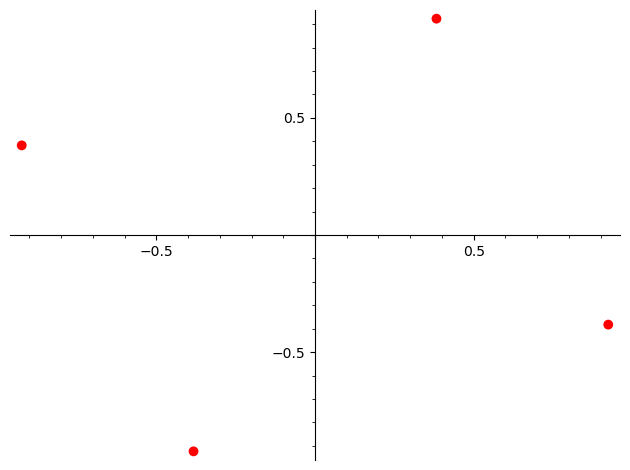

In [8]:
roots = [CC(s.rhs()) for s in complex_roots]

pts = points([(r.real(), r.imag()) for r in roots], color='red', size=50)
show(pts)

Добавим комплексную плоскость

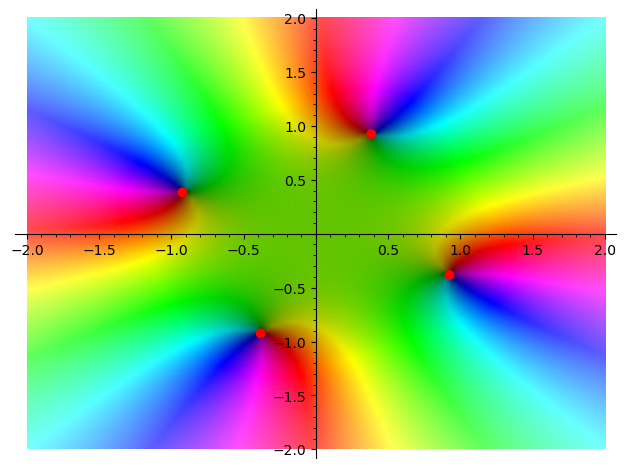

In [9]:
f(z) = z^4 + I
compl_plot = complex_plot(f, (-2, 2), (-2, 2))
show(compl_plot + pts)

## **Задание 2.** Представьте выражение в алгебраической форме. Изобразите точки, соответствующие аргументу и значению функции, в одной системе координат.

In [10]:
var('z')

eq = cos(pi/6 + 2 * I)
show(eq)

cos(1/6*pi + 2*I)

Для перевода в алгебраическую форму можно использовать `simplify_full`

In [11]:
eq = eq.simplify_full()
show(eq)

1/2*sqrt(3)*cosh(2) - 1/2*I*sinh(2)

Построим точки аргумента/значения функции, добавим комплексное поле

In [12]:
f(z) = z - cos(pi/6 + 2 * I)
compl_plot = complex_plot(f, (-10, 10), (-10, 10))

Построим сами точки

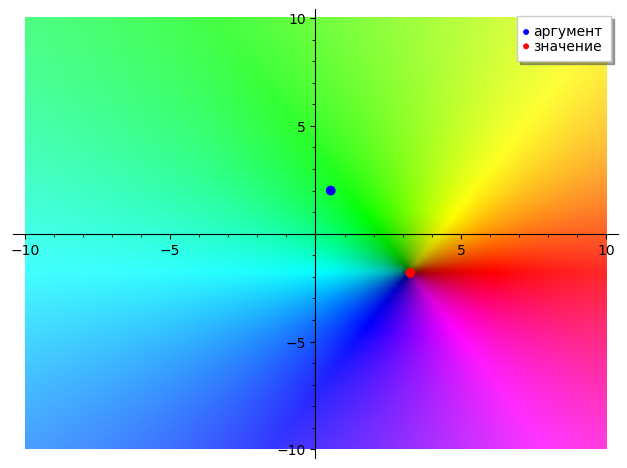

In [13]:
z_in_cc  = CC(pi/6 + 2*I)
z_out_cc = CC(cos(pi/6 + 2*I))

show(compl_plot + points([(z_in_cc.real(),  z_in_cc.imag())],  color='blue',  size=50, legend_label="аргумент") 
  + points([(z_out_cc.real(), z_out_cc.imag())], color='red',   size=50, legend_label="значение"))

## **Задание 3.** Представьте выражение в алгебраической форме и получите результат в СКА. Найдите его главное значение.

In [14]:
var('z')

eq = arcsin(4)
show(eq)

arcsin(4)

**Sage** не выполняет преобразование через [логорифмические формы](https://en.wikipedia.org/wiki/Inverse_trigonometric_functions#Logarithmic_forms), необходимо сделать это вручную. Для $ arcsin(4) $ имеем:
$$
arcsin(z) = i*ln(\sqrt{1 - z^{2}} - iz)
$$

В нашем случае будет:
$$
arcsin(4) = i*ln(\sqrt{-15}-4i) = i*ln(i * (\sqrt{15}-4))
$$

Главное значение для $ arcsin(z) $ таким образом будет:
$$
arcsin(4)_{principal} = \frac{\pi}{2} + i * ln(4 - \sqrt{15})
$$
Сверим значения переведя в численный вид.

In [15]:
eq = I * ln(I * (sqrt(15) - 4))
eq_principal = pi / 2 + I * ln(4 - sqrt(15))

show(CC(eq) == CC(eq_principal))

True

## **Задание 4.** Изобразите области, заданные неравенствами.
Здесь мы имеем дело с геометрией комплексных чисел. Точка здесь будет задана как:
$$
z = x + i * y
$$

In [16]:
var('x y')
z = x + I*y

Зададим условия в виде булевых выражений

In [17]:
ineq1 = abs(z + I) >= 1
ineq2 = abs(z) < 2

Рисуем область и добавим границы окружностей

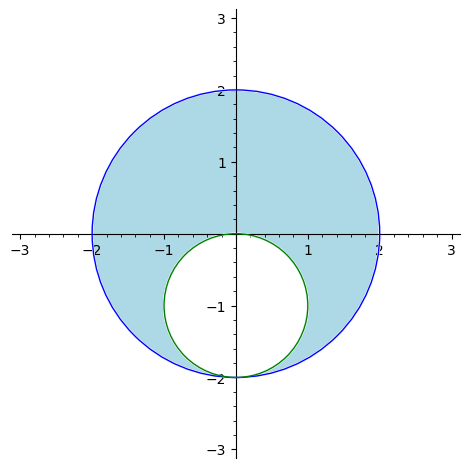

In [18]:
region = region_plot([ineq1, ineq2], (x, -3, 3), (y, -3, 3), incol='lightblue', plot_points=400)

outer_circle = circle((0,0), 2, color='blue')
inner_circle = circle((0,-1), 1, color='green')

show(region + outer_circle + inner_circle)

Во втором задании добавляетя работа с $ arg $. $ arg(z) $ называется [аргументом](https://en.wikipedia.org/wiki/Argument_(complex_analysis)) - это угол комплексного числа. Зададим новые условия. 

In [19]:
ineq1 = abs(z + I) > 1
ineq2 = (arg(z) >= -pi/4) and (arg(z) < 0)

Закрасим регион, добавим окружность и два луча, которые описывают аргумент.

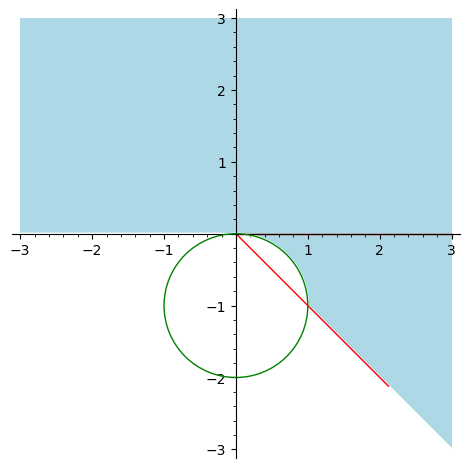

In [20]:
region = region_plot([ineq1, ineq2], (x, -3, 3), (y, -3, 3), incol='lightblue', plot_points=500)
circle_boundary = circle((0,-1), 1, color='green')
line1 = line([(0,0),(3,0)], color='red')
line2 = line([(0,0),(3*cos(-pi/4), 3*sin(-pi/4))], color='red')

(region + circle_boundary + line1 + line2)

## **Задание 5.** Определите вид кривой. Сделайте чертеж.

Дано параметрическое задание кривой через параметр $ t $ 
$$
z = 2sect - i3tgt
$$, где $ z = x + iy $.

Для определения ее вида перейдем к уравнению кривой
$$
x(t) = 2sect
$$
$$
y(t) = -3tgt
$$
т.к. $ sec^{2}t - tan^{2}t = 1 $ составим уравнение

In [21]:
var('x y')

eq = simplify((x/2) ** 2 - (y/-3) ** 2 == 1)
show(eq)

1/4*x^2 - 1/9*y^2 == 1

Это уравнение гиперболы

verbose 0 (3987: plot.py, generate_plot_points) WARNING: When plotting, failed to evaluate function at 1333 points.
verbose 0 (3987: plot.py, generate_plot_points) Last error message: 'Unable to compute f(1.9992277076987186)'
verbose 0 (3987: plot.py, generate_plot_points) WARNING: When plotting, failed to evaluate function at 1333 points.
verbose 0 (3987: plot.py, generate_plot_points) Last error message: 'Unable to compute f(1.9980616350474487)'


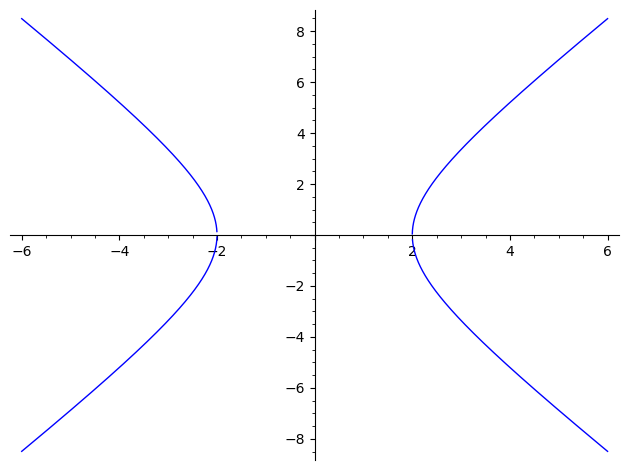

In [22]:
eq_y = solve(eq, y)
show(plot(eq_y[0].rhs(), (x,-6,6), plot_points=4000) + plot(eq_y[1].rhs(), (x,-6,6), plot_points=4000))

## **Задание 6.** Восстановите аналитическую в окрестности точки $ z_{0} $ функцию $ f(x) $ по известной действительной $ u(x, y) $ или мнимой $ v(x, y) $ части и значению $ f(z_{0}) $.

In [23]:
var('x y')

u = x^2 - y^2 - 2*x + 1
show(u)

x^2 - y^2 - 2*x + 1

Возьмем частные производные

In [24]:
ux = diff(u, x)
uy = diff(u, y)

show(ux)
show(uy)

2*x - 2

-2*y

Далее нам понадобится [условия Коши-Римана](https://en.wikipedia.org/wiki/Cauchy%E2%80%93Riemann_equations). Это соотношения, связывающие вещественную $ u = u ( x , y ) $ и мнимую $ v = v ( x , y ) $ части всякой дифференцируемой функции комплексного переменного.
$$
\frac{\partial u}{\partial x} = \frac{\partial v}{\partial y}
$$

$$
\frac{\partial u}{\partial y} = -\frac{\partial v}{\partial x}
$$

In [25]:
v_general = integrate(ux, y) + function('phi')(x)
vx = diff(v_general, x)
show(vx)
show(-uy)

eq = diff(v_general, x) + uy 
show(solve(eq))

2*y + diff(phi(x), x)

2*y

[diff(phi(x), x) == 0]

Видно, что $ \frac{\partial}{\partial x} \phi(x) = 0 $, следовательно $ \phi(x) = C $. Из этого имеем $ v(x,y) = (2x - 2)*y + C $

In [26]:
v = (2*x - 2)*y

Собираем аналитическую функцию через $ z = x + i*y $

In [27]:
z = var('z')
f = z^2 - 2*z + 1
show(f)

z^2 - 2*z + 1

## **Задание 7.** Вычислите интеграл от функции комплексного переменного по заданному множеству $ L $. Получите ответ в СКА. Сделайте чертеж.
Начнем с параметризации пути

In [28]:
var('t')
z = e^(I*t)
dz = diff(z, t)

Получим подынтегральная функция

In [29]:
f = (z + 1)*exp(z)
integrand = f * dz

Возьмем интеграл

In [30]:
sol = integral(integrand, (t, -pi/2, pi/2))
show(sol.simplify_full())

2*I*cos(1)

Получим численное значение

In [31]:
CC(sol)

1.08060461173628*I

Построим график пути $ L $

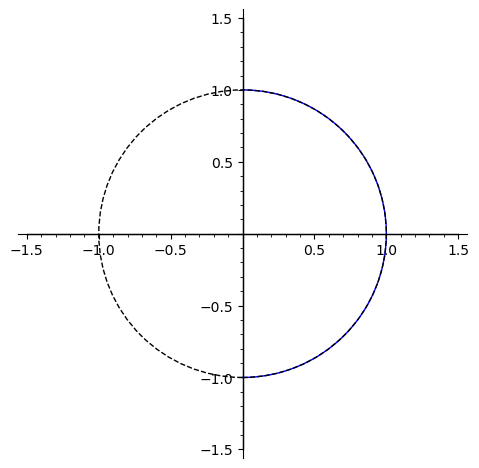

In [32]:
L = parametric_plot((cos(t), sin(t)), (t, -pi/2, pi/2), color='blue')
circle_unit = circle((0,0), 1, color='black', linestyle='--')
axes = line([(-1.5,0),(1.5,0)], color='black') + line([(0,-1.5),(0,1.5)], color='black')

show(circle_unit + L + axes)

## **Задание 8.** Найдите все лорановские разложения заданной функции по степеням $ z $. Получите ответ в СКА.

In [33]:
z = var('z')

Для разложкния в ряд необходимо объявить [кольцо](https://en.wikipedia.org/wiki/Ring_(mathematics)), оно будет выполнять роль среды для ряда. Важно, что кольцо должно быть объявлено до описания общего члена ряда, так как в нем должны использоваться имена из объявленного кольца (в данном случае $ z $). 

In [34]:
K = Frac(CC[[z]], names=(z,))
(z,) = K._first_ngens(1)

Теперь можно описать функцию и получить от нее разложение Лорана.

In [35]:
f = (2*z - 16)/(z^4 + 2*z^3 - 8*z^2)
f.laurent_polynomial() 

2.00000000000000*z^-2 + 0.250000000000000*z^-1 + 0.312500000000000 + 0.109375000000000*z + 0.0664062500000000*z^2 + 0.0302734375000000*z^3 + 0.0158691406250000*z^4 + 0.00775146484375000*z^5 + 0.00392150878906250*z^6 + 0.00194931030273438*z^7 + 0.000977516174316406*z^8 + 0.000488042831420898*z^9 + 0.000244200229644775*z^10 + 0.000122055411338806*z^11 + 0.0000610388815402985*z^12 + 0.0000305166468024254*z^13 + 0.0000152590218931437*z^14 + (7.62933632358909e-6)*z^15 + (3.81471181754023e-6)*z^16 + (1.90734499483369e-6)*z^17

## **Задание 9.** Найдите все лорановские разложения данной функции по степеням $ z - z_{0} $.

In [36]:
var('z w')

(z, w)

Есть и другой способ работы с рядами (без прямого объявления кольца). Сразу опишем функцию и $ z_{0} $

In [37]:
z0 = 2 - 3*I
f = (z+1)/(z*(z-1))
show(f)

(z + 1)/((z - 1)*z)

Осуществим необходимую подстановку. Введем переменную:
$$
w = z - z_{0}
$$тогда имеем следующее:
$$
z = z_{0} + w
$$

In [38]:
f_w = f.subs(z = z0 + w)
show(f_w)

(w - 3*I + 3)/((w - 3*I + 2)*(w - 3*I + 1))

Простое разложение в ряд Лорана (до $ w_{5} $).

In [39]:
laurent_series = f_w.series(w, 10)
show(laurent_series)


(24/65*I + 3/65) + (-207/4225*I + 551/4225)*w + (-22023/549250*I - 17061/549250)*w^2 + (267732/17850625*I - 348677/35701250)*w^3 + (6348621/4641162500*I + 27807147/4641162500)*w^4 + (-616486653/301675562500*I - 21298024/75418890625)*w^5 + (12843755733/39217823125000*I - 23360044719/39217823125000)*w^6 + (45416940282/318644812890625*I + 429143214967/2549158503125000)*w^7 + (-22091419048041/331390605406250000*I + 7793201698413/331390605406250000)*w^8 + (9911837568213/21540389351406250000*I - 120732585462871/5385097337851562500)*w^9 + Order(w^10)

## Задание 10. Заданную функцию разложите в ряд Лорана в окрестности точки $ z_{0} $.

In [26]:
var('z')
f(z) = sin(z/(z-1))
show(f(z))

sin(z/(z - 1))

Взять ряд напрямую не выйдет, так как точка дает деление на ноль. Проведем замену.

In [27]:
w = var('w')
g(w) = f(w+1)
show(g(w))

sin((w + 1)/w)

Для дальнейшего разложения можно перейти к ряду Тейлора для $ sin(\frac{1}{w}) $ и $ cos(\frac{1}{w}) $, используем `series`

In [30]:
x = var('x')
sin_series = sin(x).series(x, 7)
cos_series = cos(x).series(x, 7)

show(sin_series)
show(cos_series)

1*x + (-1/6)*x^3 + 1/120*x^5 + Order(x^7)

1 + (-1/2)*x^2 + 1/24*x^4 + (-1/720)*x^6 + Order(x^7)

Подставим $ \frac{1}{w} $

In [31]:
sin_part = sin_series.subs(x=1/w)
cos_part = cos_series.subs(x=1/w)

show(sin_series)
show(cos_series)

1*x + (-1/6)*x^3 + 1/120*x^5 + Order(x^7)

1 + (-1/2)*x^2 + 1/24*x^4 + (-1/720)*x^6 + Order(x^7)

Собираем все вместе

In [32]:
laurent_series = sin(1) * cos_part + cos(1) * sin_part
show(laurent_series)

1/120*(120/w - 20/w^3 + 1/w^5)*cos(1) - 1/720*(360/w^2 - 30/w^4 + 1/w^6 - 720)*sin(1)

Заменяем $ w $ обратно на $ z-1 $

In [33]:
final_series = laurent_series.subs(w=z-1)
show(expand(final_series))

1/120*cos(1)/(z^5 - 5*z^4 + 10*z^3 - 10*z^2 + 5*z - 1) - 1/6*cos(1)/(z^3 - 3*z^2 + 3*z - 1) + cos(1)/(z - 1) - 1/720*sin(1)/(z^6 - 6*z^5 + 15*z^4 - 20*z^3 + 15*z^2 - 6*z + 1) + 1/24*sin(1)/(z^4 - 4*z^3 + 6*z^2 - 4*z + 1) - 1/2*sin(1)/(z^2 - 2*z + 1) + sin(1)

## **Задача 11.** Вычислите интеграл.

$$
\oint_{|z - 1 - i = \frac{5}{4}|} \frac{2}{z^{2} (z - 1)}dz
$$

В **Sagemath** нет функций для вычисления интеграла по замкнутому контуру $ \oint $. Поэтому необходимо свести вычисление комплексного интеграла по замкнутому контуру можно к [формуле вычетов](https://en.wikipedia.org/wiki/Residue_theorem):
$$
\oint_{\gamma} f(z) dz = 2 \pi i \sum_{k=1}^{n} I (\gamma, a_{k}) Res(f, a_{k})
$$
В случае, когда $ \gamma $ является простой замкнутой положительно ориентированной кривой, формулу можно упростить.
$$
\oint f(z) dz = 2 \pi i \sum Res(f, a_{k})
$$

Вычеты будем производить через *sympy* внтури **sagemath**

In [44]:
import sympy as sp

z = sp.symbols('z')
f = 2/(z**2 * (z-1))
show(f)

2/((z - 1)*z^2)

Вычисляем вычеты. В данном случае это точки $ z = 0 $ и $ z = 1 $. Определим центр и радиус контура из условий.

In [45]:
center = 1 + sp.I
R = sp.Rational(5, 4)

Особые точки в данном случае $ [0, 1] $

In [46]:
poles = [0, 1]

Найдем вычеты, которые попал в контур $$ |z - (1+i)| = \frac{5}{4} $$

In [47]:
inside_residues = []
for p in poles:
    res = sp.residue(f, z, p)
    dist = abs(complex(p - center))
    inside = dist < float(R)
    if inside:
        inside_residues.append(res)

show(inside_residues)

[2]

Вычислим интеграл по теореме о вычетах

In [48]:
integr = 2*pi*I * sum(inside_residues)
show(integr.simplify())

4*I*pi

## **Задание 12.** Вычислите интеграл.
$$
\oint_{|z| = \frac{1}{2}} \frac{2 - z^2 + 3 z^3}{4z^3}dz
$$

При нахождении вычетов можно использовать другой способ - поиск вычетов через ряд Лорана

In [49]:
import sympy as sp

z = sp.symbols('z')
f = (2 - z**2 + 3*z**3)/(4*z**3)
show(f)

1/4*(3*z^3 - z^2 + 2)/z^3

Опишем контур 

In [50]:
center = 0
R = sp.Rational(1, 2)

Имеем одну особую точку $ [0] $

In [51]:
poles = [0]

Разложим функцию в ряд Лорана вокруг $ z=0 $, найдем вычет и проверим, входит ли он в контур

In [52]:
inside_residues = []
for p in poles:
    laurent = sp.series(f, z, p, n=10)
    coeff = laurent.coeff((z-p)**(-1))
    inside = abs(complex(p - center)) < R
    if inside:
        inside_residues.append(coeff)

integr = 2*pi*I * sum(inside_residues)
show(integr.simplify())

-1/2*I*pi

## **Задание 13.** Вычислите интеграл.
$$
\oint_{|z| = 1} \frac{cos3z - 1 + 9z^2 / 2}{z^4sh \frac{9}{4}z}dz
$$

In [53]:
import sympy as sp

z = sp.symbols('z')
f = (cos(3 * z) - 1 + 9 * z ** 2 / 2 )/(z ** 4 * sinh(9/4 * z))
show(f)

1/2*(9*z^2 + 2*cos(3*z) - 2)/(z^4*sinh(9/4*z))

Опишем контур

In [54]:
center = 0
R = 1

Опять же имеем одну особую точку $ [0] $

In [55]:
poles = [0]

Попробуем оба метода разложения. Первый способом будет разложение в ряд.

In [56]:
inside_residues = []
for p in poles:
    laurent = sp.series(f, z, p, n=10)
    coeff = laurent.coeff((z-p)**(-1))
    inside = abs(complex(p - center)) < R
    if inside:
        inside_residues.append(coeff)

integr_laurent= (2*pi*I * sum(inside_residues)).simplify()

Теперь используем $ residue $.

In [57]:
inside_residues = []
for p in poles:
    res = sp.residue(f, z, p)
    dist = abs(complex(p - center))
    inside = dist < float(R)
    if inside:
        inside_residues.append(res)

integr_residue = (2*pi*I * sum(inside_residues)).simplify()

Сравним

In [58]:
show(integr_laurent)
show(integr_residue)
show(integr_laurent == integr_residue)

3*I*pi

3*I*pi

3*I*pi == 3*I*pi

## **Задание 14.** Вычислите интеграл.
$$
\int_{0}^{2\pi} \frac{dt}{4 + \sqrt{15} sint}
$$

In [4]:
t = var('t')
f = 1 / (4 + sqrt(15)*sin(t))

Данный интеграл вычисляется довольно просто. Существует классическая формула разложения.
$$
\int_{0}^{2\pi} \frac{dt}{a + b sint} = \frac{2\pi}{\sqrt{a^2 - b^2}}
$$

После подстановки получим

$$
\int_{0}^{2\pi} \frac{dt}{a + b sint} = 2\pi
$$

Проверим

In [5]:
I = integrate(f, (t, 0, 2*pi))
show(I.simplify())

2*pi

## **Задание 15.** Постройте образ квадрата, прилежащего к координатным осям в 1-й яетверти, с вершиной $ (2, 2 + 2i) $ при заданном преобразовании.

Есть квадрат в первой четверти, прилежащий к осям координат. Задана его вершина:
$$
z=2+2i.
$$
Значит, квадрат — это:
$$
Q = \{x + iy | 0 \le x \le 2, 0 \le x \le 2\}
$$

In [9]:
t = var('t')

Кроме того дано преобразование
$$
w = -z^2
$$

In [10]:
def phi(z):
    return -(z**2)

Возьмем образы вершин квадрата $ z_{1}, z_{2}, z_{3}, z_{4} $

In [11]:
vertices_z = [0, 2, 2+2*I, 2*I]
vertices_w = [phi(v) for v in vertices_z]

Построим квадрат в $z$-плоскости

In [12]:
square_z = polygon([(0,0),(2,0),(2,2),(0,2)], color="lightblue", alpha=0.5) + \
           point([(z.real(), z.imag()) for z in vertices_z], size=50, color="blue")

Построим кроме этого отображение в $w$-плоскости. Так как отображение нелинейное изображение уже не будет выглядеть как квадрат.

In [13]:
side1 = parametric_plot((real_part(phi(t)), imag_part(phi(t))), (t, 0, 2), color='blue')
side2 = parametric_plot((real_part(phi(I*t)), imag_part(phi(I*t))), (t, 0, 2), color='green')
side3 = parametric_plot((real_part(phi(2 + I*t)), imag_part(phi(2 + I*t))), (t, 0, 2), color='red')
side4 = parametric_plot((real_part(phi(t + 2*I)), imag_part(phi(t + 2*I))), (t, 0, 2), color='orange')

Построим все вместе

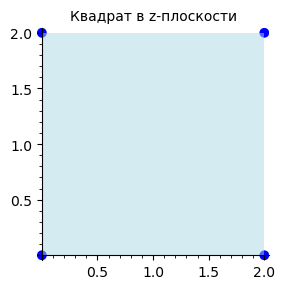

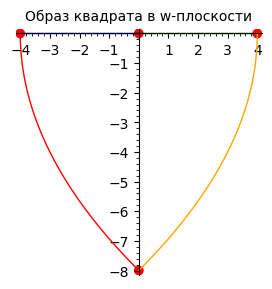

In [14]:
image_w = side1 + side2 + side3 + side4 + \
          point([(w.real(), w.imag()) for w in vertices_w], size=50, color="red")

show(square_z, figsize=4, title="Квадрат в z-плоскости")
show(image_w, figsize=4, title="Образ квадрата в w-плоскости")